# Project 2

### Betsy Rosalen and Mikhail Groysman

## Project Overview

1. Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
2. Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
3. What can you infer about each of the distinct groups?

## Choosing the data

We chose...

## Loading the data

First import necessary packages for plotting graphs using NetworkX and Matplotlib and set up graph size parameters...

In [2]:
import networkx as nx
from networkx.algorithms import bipartite as bi
import pandas as pd
#import numpy as np
#from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

Read data to a Pandas dataframe.

In [3]:
github = pd.read_csv("Project2_Data/github/ent.github.repository.name", 
                       header=None, sep="/", 
                       names=['User','Project'])
github.head()

,User,Project
0,richardc,perl-number-compare
1,axiomsoftware,axiom-inspector
2,rails,open_id_authentication
3,brandonkelly,bk.fieldframe.ee_addon
4,skinofstars,boxfire


In [4]:
len(github)

120867

In [5]:
G = nx.Graph()

# Add nodes with the node attribute "bipartite"
G.add_nodes_from(list(github.User), bipartite=0)
G.add_nodes_from(list(github.Project), bipartite=1)

edge_list = [tuple(x) for x in github.values]

# Add edges only between nodes of opposite node sets
G.add_edges_from(edge_list)

In [6]:
user_nodes = {n for n, d in G.nodes(data=True) if d['bipartite']==0}
project_nodes = set(G) - user_nodes

In [7]:
nx.is_connected(G)

False

In [8]:
bi.is_bipartite(G)

False

In [9]:
print(bi.density(G, user_nodes))

4.2161212557073313e-05


In [10]:
print(bi.density(G, project_nodes))

4.2161212557073313e-05


In [11]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 111735
Number of edges: 120827
Average degree:   2.1627


In [22]:
def trim_edges(g, weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,edata)
    return g2

def island_method(g, iterations=5):
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]


### Users

In [16]:
# compute an affiliation network of the Users
users = bi.weighted_projected_graph(G, user_nodes)

# Find the largest connected subgraph in the network
#users_subgraph = nx.connected_component_subgraphs(users)[0]  # textbook code doesn't work
users_subgraph = max(nx.connected_component_subgraphs(users), key=len)  # alternate method

users_subgraph.name = "Users"

print(nx.info(users_subgraph))

Name: Users
Type: Graph
Number of nodes: 26161
Number of edges: 1655719
Average degree: 126.5792


In [17]:
nx.is_connected(users_subgraph)

True

In [18]:
bi.is_bipartite(users_subgraph)

False

In [23]:
#cc=max(nx.connected_component_subgraphs(users_subgraph), key=len)
islands=island_method(users_subgraph)
for i in islands:
    # print the threshold level, size of the graph, and number of connected components
    print(i[0], len(i[1]), len(nx.connected_component_subgraphs(i[1])))

TypeError: add_edge() takes 3 positional arguments but 4 were given

In [ ]:
# set plot size
plt.rcParams["figure.figsize"] = (15,15)

'''
# create empty list for node colors
colors = []

# for each node in the graph append the color to the list
for node, data in users_subgraph.nodes(data=True):
    if data['bipartite']==0:
        colors.append('steelblue')         
    else:
        colors.append('coral')
'''

nx.draw(users_subgraph, 
        with_labels=True, 
        node_color='steelblue', 
        node_size=400, 
        font_weight='bold', 
        edge_color="skyblue", 
        alpha=0.5)

### Projects

In [17]:
# compute an affiliation network of the Users
projects = bi.weighted_projected_graph(G, project_nodes)

# Find the largest connected subgraph in the network
#users_subgraph = nx.connected_component_subgraphs(users)[0]  # textbook code doesn't work
projects_subgraph = max(nx.connected_component_subgraphs(projects), key=len)  # alternate method

projects_subgraph.name = "Users"

print(nx.info(projects_subgraph))

Name: Users
Type: Graph
Number of nodes: 60297
Number of edges: 779501
Average degree:  25.8554


In [18]:
nx.is_connected(users_subgraph)

True

In [19]:
bi.is_bipartite(users_subgraph)

False

#### Visualize GitHub User Network

MemoryError: 

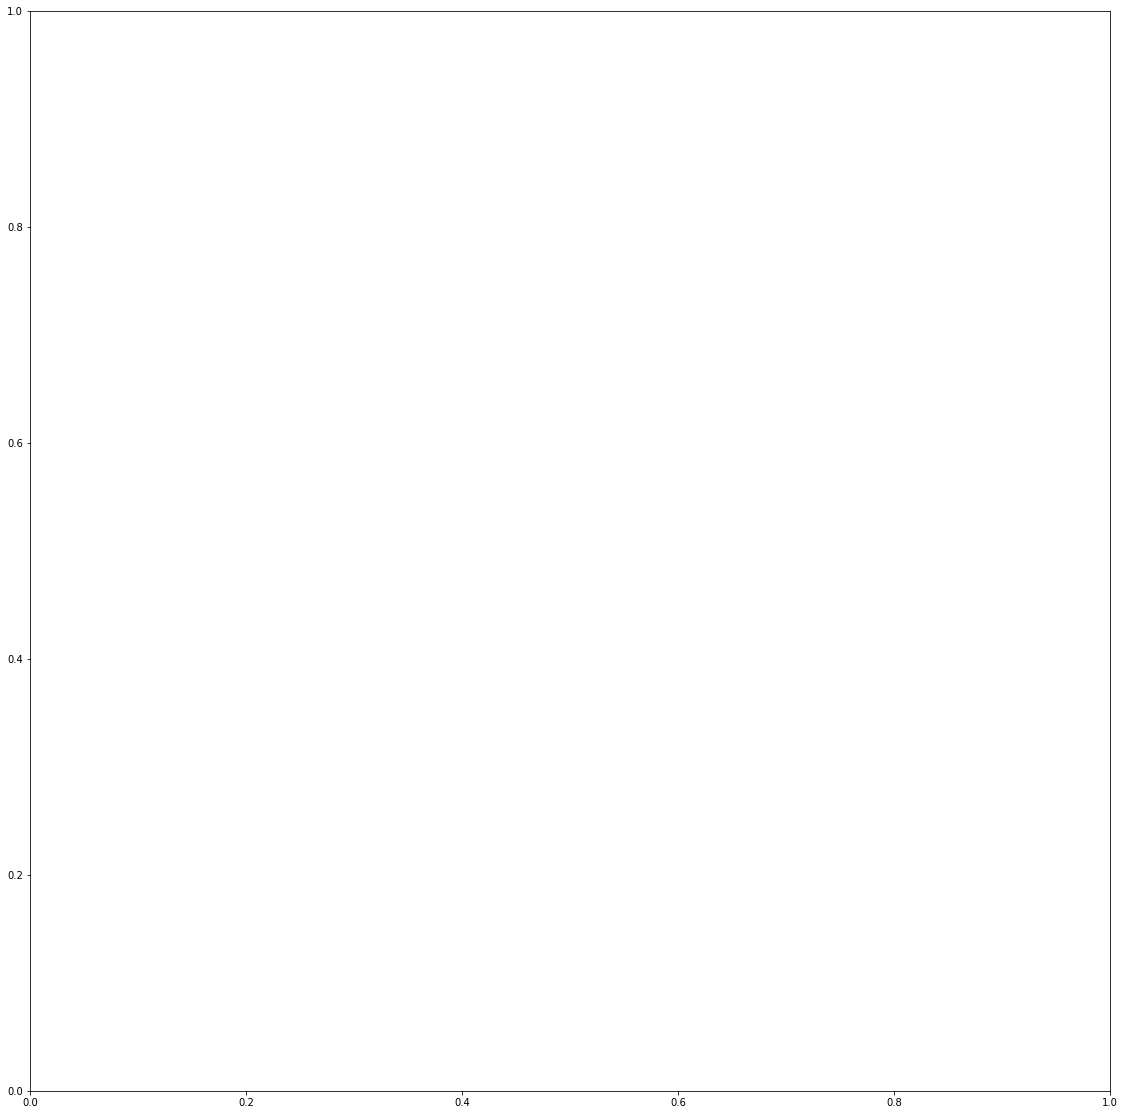

In [21]:
# set plot size
plt.rcParams["figure.figsize"] = (15,15)

'''
# create empty list for node colors
colors = []

# for each node in the graph append the color to the list
for node, data in projects_subgraph.nodes(data=True):
    if data['bipartite']==0:
        colors.append('steelblue')         
    else:
        colors.append('coral')
'''
        
nx.draw(projects_subgraph, 
        with_labels=True, 
        node_color='steelblue', 
        node_size=400, 
        font_weight='bold', 
        edge_color="skyblue", 
        alpha=0.5)

## YouTube Video Presentation Link

https://www.youtube.com/watch?v=4OwKYsMmvgw